
# DAG - Topological Layout

This example combines the `topological_generations` generator with
`multipartite_layout` to show how to visualize a DAG in topologically-sorted
order.


0
1
2
2
3
4
4
5


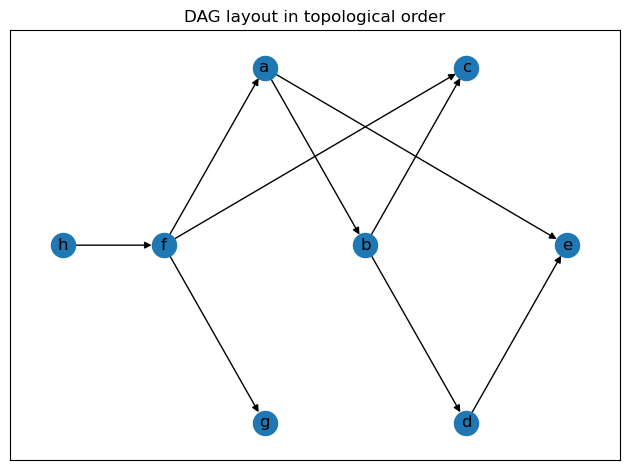

In [4]:
import networkx as nx
import matplotlib.pyplot as plt


G = nx.DiGraph(
    [
        ("f", "a"),
        ("a", "b"),
        ("a", "e"),
        ("b", "c"),
        ("b", "d"),
        ("d", "e"),
        ("f", "c"),
        ("f", "g"),
        ("h", "f"),
    ]
)

for layer, nodes in enumerate(nx.topological_generations(G)):
    # `multipartite_layout` expects the layer as a node attribute, so add the
    # numeric layer value as a node attribute
    for node in nodes:
        G.nodes[node]["layer"] = layer #layer is an int
        print(nodes)
        print(layer)

# Compute the multipartite_layout using the "layer" node attribute
pos = nx.multipartite_layout(G, subset_key="layer")

fig, ax = plt.subplots()
nx.draw_networkx(G, pos=pos, ax=ax)
ax.set_title("DAG layout in topological order")
fig.tight_layout()
plt.show()